## 主題：比特幣價格預測
使用LSTM進行比特幣價格預測 

In [1]:
%env KERAS_BACKEND = tensorflow

env: KERAS_BACKEND=tensorflow


In [41]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.pyplot import figure
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)  

In [3]:
# Keras functions
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation
from keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


### 資料前處理
資料來源:https://www.CryptoDataDownload.com  
交易所選擇:Bitfinex

In [4]:
BTC = pd.read_csv("Bitfinex_BTCUSD_d.csv")

In [5]:
BTC.head()

,,,,,,Created on 06-04-2019,https://www.CryptoDataDownload.com
Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
2019-06-04,BTCUSD,8099.2,8099.2,7770,7974.2,7369.28,58427590.97
2019-06-03,BTCUSD,8740.1,8740.1,8032,8099.2,18661.44,156710105.15
2019-06-02,BTCUSD,8547,8825,8540,8740.1,6243.25,54274886.92
2019-06-01,BTCUSD,8532.67,8625.7,8451,8547,5457.31,46595695.69


In [6]:
BTC.tail()

,,,,,,Created on 06-04-2019,https://www.CryptoDataDownload.com
2015-02-13,BTCUSD,222.39,241.76,221.46,236,29079.11,6806972.89
2015-02-12,BTCUSD,219.19,223.2,217.87,222.6,11190.65,2468883.37
2015-02-11,BTCUSD,220.96,224.4,218.1,219.19,19289.28,4268986.79
2015-02-10,BTCUSD,220.61,223.88,214,220.96,29268.95,6402350.57
2015-02-09,BTCUSD,224.22,225,215.4,220.61,29625.03,6493501.42


In [7]:
BTC.reset_index().head()

,level_0,level_1,level_2,level_3,level_4,level_5,Created on 06-04-2019,https://www.CryptoDataDownload.com
0,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
1,2019-06-04,BTCUSD,8099.2,8099.2,7770,7974.2,7369.28,58427590.97
2,2019-06-03,BTCUSD,8740.1,8740.1,8032,8099.2,18661.44,156710105.15
3,2019-06-02,BTCUSD,8547,8825,8540,8740.1,6243.25,54274886.92
4,2019-06-01,BTCUSD,8532.67,8625.7,8451,8547,5457.31,46595695.69


In [8]:
BTC = BTC.reset_index()

In [9]:
colnames = BTC.loc[0].values

In [10]:
BTC = BTC[1:]

In [11]:
BTC.columns = colnames

In [12]:
BTC.head()

,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
1,2019-06-04,BTCUSD,8099.2,8099.2,7770,7974.2,7369.28,58427590.97
2,2019-06-03,BTCUSD,8740.1,8740.1,8032,8099.2,18661.44,156710105.15
3,2019-06-02,BTCUSD,8547,8825,8540,8740.1,6243.25,54274886.92
4,2019-06-01,BTCUSD,8532.67,8625.7,8451,8547,5457.31,46595695.69
5,2019-05-31,BTCUSD,8270,8550,8099.9,8532.67,10929.36,91049145.46


#### 將資料型態改為float

In [13]:
BTC.dtypes

Date          object
Symbol        object
Open          object
High          object
Low           object
Close         object
Volume BTC    object
Volume USD    object
dtype: object

In [14]:
BTC.Close = pd.to_numeric(BTC.Close)

In [15]:
BTC.dtypes

Date           object
Symbol         object
Open           object
High           object
Low            object
Close         float64
Volume BTC     object
Volume USD     object
dtype: object

#### 設定Date

In [16]:
BTC["Date"] = pd.to_datetime(BTC.Date)

In [17]:
BTC_Date = BTC.set_index("Date")

In [18]:
BTC_Date.head()

,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
Date,,,,,,,
2019-06-04,BTCUSD,8099.2,8099.2,7770,7974.20,7369.28,58427590.97
2019-06-03,BTCUSD,8740.1,8740.1,8032,8099.20,18661.44,156710105.15
2019-06-02,BTCUSD,8547,8825,8540,8740.10,6243.25,54274886.92
2019-06-01,BTCUSD,8532.67,8625.7,8451,8547.00,5457.31,46595695.69
2019-05-31,BTCUSD,8270,8550,8099.9,8532.67,10929.36,91049145.46


In [19]:
BTC_Date[::-1].head()

,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
Date,,,,,,,
2015-02-09,BTCUSD,224.22,225,215.4,220.61,29625.03,6493501.42
2015-02-10,BTCUSD,220.61,223.88,214,220.96,29268.95,6402350.57
2015-02-11,BTCUSD,220.96,224.4,218.1,219.19,19289.28,4268986.79
2015-02-12,BTCUSD,219.19,223.2,217.87,222.60,11190.65,2468883.37
2015-02-13,BTCUSD,222.39,241.76,221.46,236.00,29079.11,6806972.89


#### 畫出Bitcoin歷年Close價格

Text(0, 0.5, 'USD / BTC')

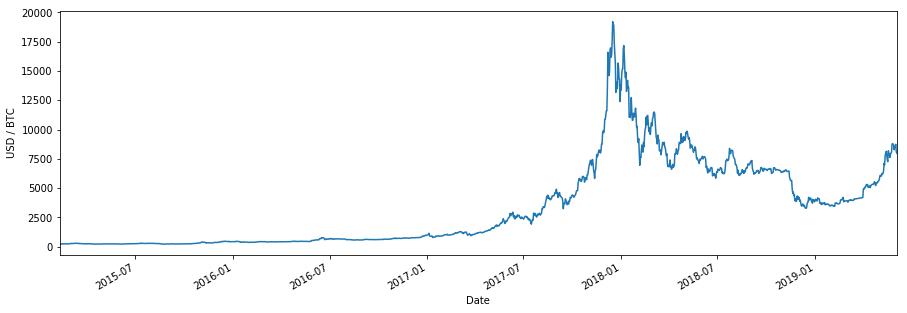

In [20]:
BTC_Date.Close.plot(figsize = [15, 5])
plt.ylabel("USD / BTC")

#### 正規化

In [21]:
scaler = MinMaxScaler(feature_range = (0, 1))

BTC_Close_values = BTC_Date[::-1].Close.values.reshape(-1,1)
BTC_Close_scaled = scaler.fit_transform(BTC_Close_values)

In [22]:
BTC_Close_scaled.shape

(1565, 1)

#### 分出訓練資料 (前70%) 與測試資料 (後30%)

In [23]:
train_size = int(len(BTC_Close_scaled) * 0.7)
test_size = len(BTC_Close_scaled) - train_size

BTC_train = BTC_Close_scaled[0 : train_size, :]
BTC_test = BTC_Close_scaled[train_size : len(BTC_Close_scaled), :]

print(len(BTC_train), len(BTC_test))

1095 470


#### 設定look_back ，從資料分出X與Y  

In [24]:
def create_dataset(dataset, look_back = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [25]:
look_back = 1
BTC_trainX, BTC_trainY = create_dataset(BTC_train, look_back)
BTC_testX, BTC_testY = create_dataset(BTC_test, look_back)

1094
469


In [26]:
BTC_trainX.shape

(1094, 1)

#### 為LSTM 輸入做Reshape 
[samples, time steps, features]

In [27]:
BTC_trainX = np.reshape(BTC_trainX, (BTC_trainX.shape[0], 1, BTC_trainX.shape[1]))
BTC_testX = np.reshape(BTC_testX, (BTC_testX.shape[0], 1, BTC_testX.shape[1]))

In [28]:
BTC_trainX.shape

(1094, 1, 1)

#### 建構LSTM

In [29]:
model = Sequential()
model.add(LSTM(15, input_shape = (BTC_trainX.shape[1], BTC_trainX.shape[2])))
model.add(Dense(1))

In [30]:
model.compile(loss = 'mean_squared_error',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [31]:
history = model.fit(BTC_trainX, 
                    BTC_trainY, 
                    batch_size = 20,
                    epochs = 10,
                    validation_data = (BTC_testX, BTC_testY))

Train on 1094 samples, validate on 469 samples
Epoch 1/10
1094/1094 [==============================] - 1s 1ms/step - loss: 0.0326 - acc: 9.1408e-04 - val_loss: 0.0529 - val_acc: 0.0000e+00
Epoch 2/10
1094/1094 [==============================] - 0s 152us/step - loss: 0.0249 - acc: 9.1408e-04 - val_loss: 0.0395 - val_acc: 0.0000e+00
Epoch 3/10
1094/1094 [==============================] - 0s 148us/step - loss: 0.0195 - acc: 9.1408e-04 - val_loss: 0.0327 - val_acc: 0.0000e+00
Epoch 4/10
1094/1094 [==============================] - 0s 149us/step - loss: 0.0138 - acc: 9.1408e-04 - val_loss: 0.0195 - val_acc: 0.0000e+00
Epoch 5/10
1094/1094 [==============================] - 0s 149us/step - loss: 0.0084 - acc: 0.0018 - val_loss: 0.0115 - val_acc: 0.0000e+00
Epoch 6/10
1094/1094 [==============================] - 0s 149us/step - loss: 0.0041 - acc: 0.0018 - val_loss: 0.0050 - val_acc: 0.0000e+00
Epoch 7/10
1094/1094 [==============================] - 0s 147us/step - loss: 0.0016 - acc: 0.0018 

In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 15)                1020      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 16        
Total params: 1,036
Trainable params: 1,036
Non-trainable params: 0
_________________________________________________________________


#### 查看loss變化

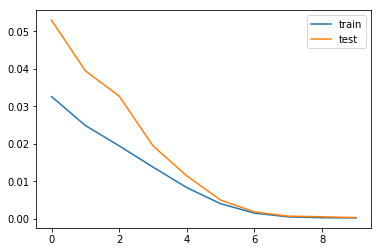

In [33]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

#### 利用測試資料比較預測結果，並畫出來

In [34]:
BTC_predict = model.predict(BTC_testX)

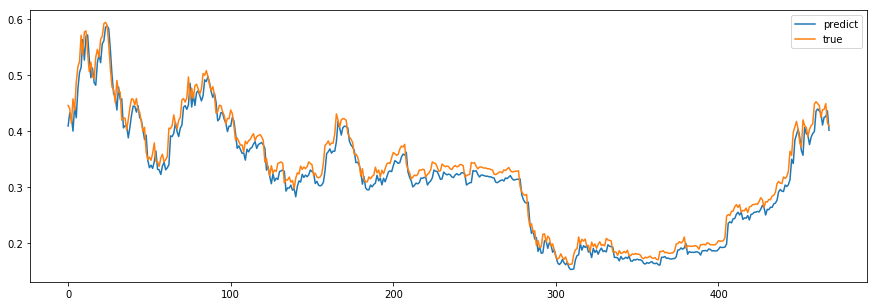

In [35]:
figure(figsize=(15, 5))
plt.plot(BTC_predict, label = 'predict')
plt.plot(BTC_testY, label = 'true')

plt.legend(loc = 'best')

#### 將正規化的數據變回價格

In [36]:
BTC_predict_inverse = scaler.inverse_transform(BTC_predict.reshape(-1, 1))
BTC_testY_inverse = scaler.inverse_transform(BTC_testY.reshape(-1, 1))

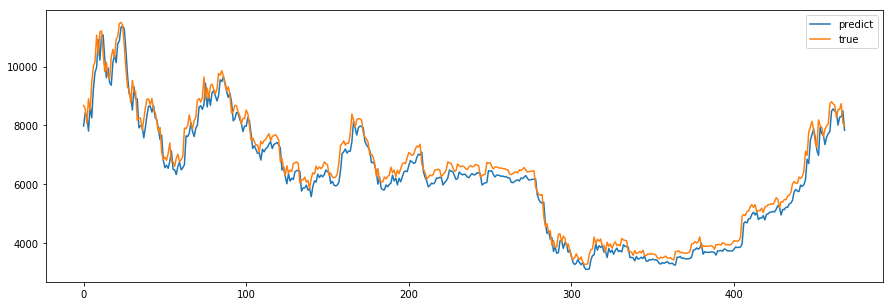

In [37]:
figure(figsize=(15, 5))
plt.plot(BTC_predict_inverse, label='predict')
plt.plot(BTC_testY_inverse, label='true')
plt.legend()

#### 將日期標上，並使用plotly

In [38]:
predictDates = BTC_Date[::-1].tail(len(BTC_testX)).index

In [39]:
BTC_testY_reshape = BTC_testY_inverse.reshape(len(BTC_testY_inverse))
BTC_predict_reshape =BTC_predict_inverse.reshape(len(BTC_predict_inverse))

In [42]:
actual_chart = go.Scatter(x = predictDates, y = BTC_testY_reshape, name = 'Actual Price')
predict_chart = go.Scatter(x = predictDates, y = BTC_predict_reshape, name = 'Predict Price')
py.iplot([predict_chart, actual_chart])